In [3]:
import warnings 
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Function

In [4]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))

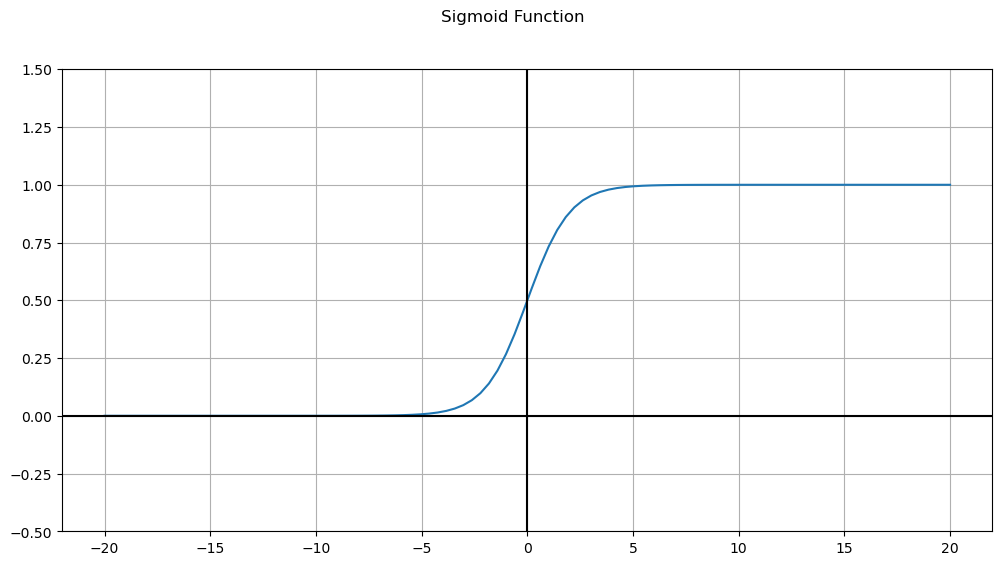

In [9]:
#Plot the sigmoid function.
vals = np.linspace(-20,20, num=100, dtype=np.float64)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid Function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

In [10]:
def logic_gate(w1, w2, b):
    return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)
def test(gate):
    for a, b in (0,0),(0,1),(1,0),(1,1):
        print("{},{}: {}".format(a, b, np.round(gate(a,b))))

### OR GATE

In [11]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0,0: 0.0
0,1: 1.0
1,0: 1.0
1,1: 1.0


### AND GATE

In [12]:
w1 = 11
w2 = 10
b = -20
and_gate = logic_gate(w1, w2, b)
test(and_gate)

0,0: 0.0
0,1: 0.0
1,0: 0.0
1,1: 1.0


### NOR(Not OR) Gate

In [14]:
w1 = -20
w2 = -20
b = 10
nor_gate = logic_gate(w1, w2, b)
test(nor_gate)

0,0: 1.0
0,1: 0.0
1,0: 0.0
1,1: 0.0


### NAND(Not AND)Gate

In [18]:
w1 = -11
w2 = -10
b = 20
nanad_gate = logic_gate(w1, w2, b)
test(nanad_gate)

0,0: 1.0
0,1: 1.0
1,0: 1.0
1,1: 0.0


### XOR (Exclusive Or) Gate

In [20]:
def and_gate(a, b):
    return a & b

def or_gate(a, b):
    return a | b

def nand_gate(a, b):
    return ~(a & b) & 1  # Ensuring the result is either 0 or 1

def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)

def test(gate):
    for a, b in (0, 0), (0, 1), (1, 0), (1, 1):
        print("{},{}: {}".format(a, b, gate(a, b)))

test(xor_gate)


0,0: 0
0,1: 1
1,0: 1
1,1: 0


In [21]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],
                     [.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/(np.sum(np.exp(vec)))

def soft_max_mat(mat):
    return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [22]:
z_2 = np.dot(x_in,W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [23]:
a_2 = sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [24]:
z_3 = np.dot(a_2,W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [25]:
a_3 = sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [26]:
z_4 = np.dot(a_3,W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [27]:
y_out = soft_max_vec(z_4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [28]:
def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [29]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [30]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])